In [3]:
pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 523 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 199 kB 8.3 MB/s 
     |████████████████████████████████| 8.8 MB 54.3 MB/s 
     |████████████████████████████████| 98 kB 7.4 MB/s 
     |████████████████████████████████| 468 kB 56.6 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=d8b0a561d09719495735aa91b5c5d6607380c786b8164102621c8e1428630dcd
  Stored in directory: /root/.cache/pip/wheels/f5/8f/2e/a689c21bc4bf04f84ceebf4b1f5846cacc04bfe179e7ad5ab0
Successfully built factor-analyzer


In [10]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt


In [11]:
df= pd.read_csv('/content/seeds.xls')
df.columns

Index(['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width',
       'Asymmetry.Coeff', 'Kernel.Groove', 'Type'],
      dtype='object')

In [12]:
df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [13]:
df.drop(['Compactness','Asymmetry.Coeff','Kernel.Groove','Type'],axis= 1,inplace=True)


In [14]:
fa = FactorAnalyzer(n_factors =4,rotation= 'varimax')
fa.fit(df)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [15]:
fa.get_factor_variance()

(array([2.03153795, 1.94764907, 0.00449172, 0.        ]),
 array([0.50788449, 0.48691227, 0.00112293, 0.        ]),
 array([0.50788449, 0.99479675, 0.99591969, 0.99591969]))

In [16]:
ev, v= fa.get_eigenvalues()
fa = FactorAnalyzer()
fa.fit(df)
fa.loadings_


array([[ 0.36717399,  0.48495678,  0.19250435],
       [ 0.4848436 ,  0.31545075,  0.24160243],
       [ 0.91078423,  0.10173247,  0.00347807],
       [ 0.10136723,  0.9288072 , -0.01514262]])

In [17]:
ev, v = fa.get_eigenvalues()
ev


array([3.84996338e+00, 1.41494724e-01, 7.22063592e-03, 1.32125827e-03])

In [18]:
df.describe()

,Area,Perimeter,Kernel.Length,Kernel.Width
count,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,5.643151,3.265533
std,2.919976,1.310445,0.443593,0.378322
min,10.590000,12.410000,4.899000,2.630000
25%,12.330000,13.470000,5.267000,2.954500
50%,14.430000,14.370000,5.541000,3.245000
75%,17.455000,15.805000,6.002000,3.564500
max,21.180000,17.250000,6.675000,4.033000


In [19]:
df.shape[1]+1

5

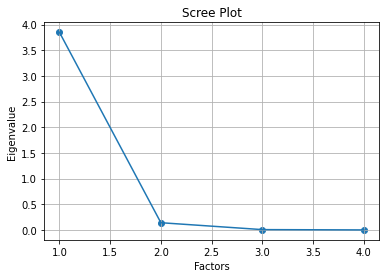

In [20]:
ev1,v1 =fa.get_eigenvalues()
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

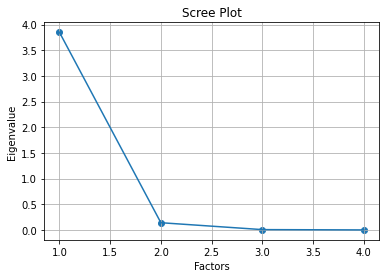

In [21]:
plt.scatter(range(1,df.shape[1]+1),ev1)
plt.plot(range(1,df.shape[1]+1),ev1)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [22]:
fa.get_factor_variance()

(array([1.20969329, 1.20772457, 0.09567106]),
 array([0.30242332, 0.30193114, 0.02391776]),
 array([0.30242332, 0.60435446, 0.62827223]))

In [23]:
fa.get_communalities()

array([0.40705775, 0.39295422, 0.83988951, 0.87318743])

In [24]:


fa.get_uniquenesses()



array([0.59294225, 0.60704578, 0.16011049, 0.12681257])